# 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='latin-1', index_col=False)

# Checking similarity and variation across the seasons.

In [41]:
recency = df[['Collectie', 'Oorspronkelijke titel']]
recency = recency.set_index('Collectie')

column_name = 'Oorspronkelijke titel'

# create the dictionary
unique_dict = {}
for index, row in recency.iterrows():
    if row[column_name] not in unique_dict.get(index, []):
        unique_dict.setdefault(index, []).append(row[column_name])
        
print(len(unique_dict))

31


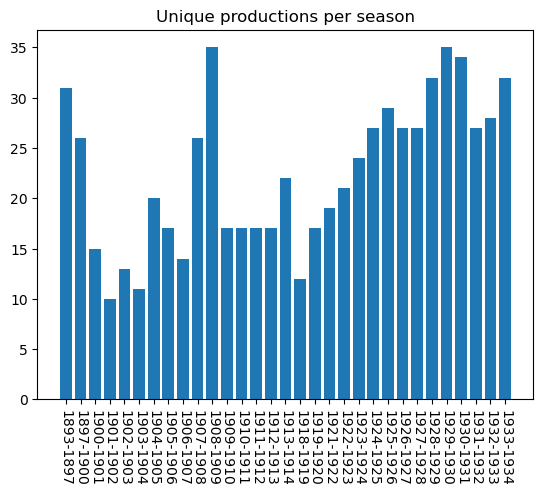

In [72]:
x = []
y = []
for key, values in unique_dict.items():
    x.append(key)
    y.append(len(values))

plt.xticks(rotation=270)
plt.title('Unique productions per season')
plt.bar(x, y);


We know have a dictionary in which the key is the season and the value is a list of all the unique productions that were performed that season. <br>
In the plot above we can see that there is are some differences in the variations of productions.<br>
Now I want to perform a cosine similarity test on the individual lists.
<br>
I expect the similarity scores are very low across consecutive seasons, but relatively similar within the entire oevre. (how can we test this)?

In [91]:
def length_similarity(c1, c2):
    lenc1 = sum(c1.values())
    lenc2 = sum(c2.values())
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))


def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

def similarity_score(l1, l2):
    c1, c2 = Counter(l1), Counter(l2)
    return length_similarity(c1, c2) * counter_cosine_similarity(c1, c2) 


from collections import Counter

counter = 0
output = []

while counter < len(x)-1:
    output.append(similarity_score(x[counter], x[counter+1]))
    counter += 1

Text(0.5, 1.0, 'Similarity score across the seasons')

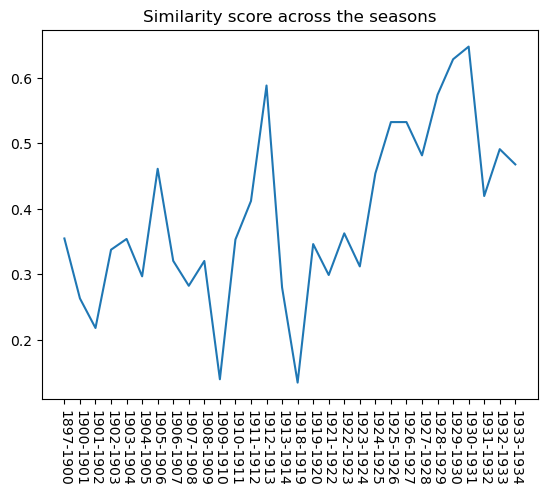

In [89]:
plt.plot(list(unique_dict.keys())[1::], output)
plt.xticks(rotation=270)
#plt.title('Unique productions per season')

plt.title('Similarity score across the seasons')

#Heel lage similatity met 1914 na de heropening, wat te verwachten valt.
#

# een viske

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='latin-1', index_col=False)
df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format = True, errors='coerce')

C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\4077991085.py:6: UserWarning: Parsing '13/02/1923' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format = True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\4077991085.py:6: UserWarning: Parsing '13/01/1900' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format = True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\4077991085.py:6: UserWarning: Parsing '18/01/1900' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format = True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\4077991085.py:6: UserWarning: Parsing '20/01/1900' in DD/MM/YYYY format. Prov

In [3]:
value_counts = df['Genormaliseerde titel'].value_counts()
df['frequency'] = df['Genormaliseerde titel'].apply(lambda x: value_counts[x])

In [4]:
old_len = len(df)
df2 = df.groupby('Genormaliseerde titel').filter(lambda d: len(d) > 1)
firsts = df2.drop_duplicates(subset=['Genormaliseerde titel']) 


In [5]:
def prepare_poisson (df, meta_col):
    firsts = df.groupby('Genormaliseerde titel').filter(lambda d: len(d) > 1)  #alle voorstellingen die maar 1 keer voorkomen worden weggehaald
    firsts = firsts.drop_duplicates(subset=['Genormaliseerde titel']) # alleen de eerste voorkomen van de productie wordt bijgehouden
    firsts = firsts.set_index('Datum')
    return firsts[['Genormaliseerde titel',  meta_col, 'frequency']]


In [6]:
prepare_poisson(df, 'Componist')

,Genormaliseerde titel,Componist,frequency
Datum,,,
1893-10-03,De Vrijschutter,Carl Maria von Weber,63
1893-10-05,Willem Tell,Carl Reinecke,2
1893-11-16,Charlotte Corday,Peter Benoit,7
1893-11-02,Parisina,Edward Keurvels,4
1893-11-14,Leiden Ontzet,Cis Van der Linden,4
...,...,...,...
1934-01-28,De Dochter van Mme Angot,Charles Lecocq,4
1934-02-24,Mister Wu,NaN,4
1934-02-24,de Zeven Hoofdzonden,NaN,2


In [28]:
from scipy.stats import poisson

first_occurence_index = df[df['Productie'] == 'Willem Tell'].index[0]
first_occurence_index
second_occurence = df.loc[(df['Productie'] == 'Willem Tell') & (df['Collectie'] != df.loc[first_occurence_index, 'Collectie'])].iloc
second_occurence

In [39]:
#ahja 
(df['Genormaliseerde titel'], 'Parisina').idxmax()


AttributeError: 'tuple' object has no attribute 'idxmax'

In [40]:
table = pd.pivot_table(df, values='Afbeelding', index=['Collectie'],
                    columns=['Genormaliseerde titel'], aggfunc='count')

In [41]:
for col in table.columns

Genormaliseerde titel,'T Minnebrugje,Abu-Hassan,Alpenlied,Anita,Arendsnest,Baldie,Bastien en Bastienne,Bergliot,Bolero,Carmen,...,Winternachtsdroom,Winternachtsdroom,Zampa,ZeeVolk,ZeeVolk,Zigeunerliefde,Zooals Voorheen,Zriny,Zwaargewicht ( of De eer van't Land),concert P. Benoit
Collectie,,,,,,,,,,,,,,,,,,,,,
1893-1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0
1897-1900,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-1901,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN
1905-1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906-1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
